<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M2_AI1_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FUNDAMENTOS DE ESTADÍSTICA**



ALUMNO: **JOSE ARMANDO ALVARADO RUIZ**




## **Descripción de la tarea**
La siguiente actividad trata sobre el precio de la gasolina de 95 octanos en España.



### **Importación librerias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

Carga de Datos y visualización general

In [43]:
url = 'https://github.com/md-lorente/data/raw/master/precio_gasolina.csv'


df = pd.read_csv(url, sep=';', decimal=',')

Visualización de los primeros 10 registros del dataset.


In [4]:
df.head(10)

,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,01 08 2020 1353,0.758,PCAN,P,dm,LD 24H,LD 24H A,01 08 2020
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,01 08 2020 0900,0.759,OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,01 08 2020
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,27 07 2020 1202,0.769,GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,01 08 2020
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,29 07 2020 0000,0.789,TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,01 08 2020
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,27 07 2020 1159,0.789,GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,01 08 2020
5,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,CALLE SUBIDA AL MAYORAZGO 7,D,27 07 2020 0934,0.789,CANARY OIL S L,P,dm,LD 24H,LD 24H A,01 08 2020
6,MELILLA,MELILLA,52005,PLAZA MARTIN DE CORDOBA 17,D,22 07 2020 0300,0.818,SHELL,P,dm,LS 07002300,LS 07002300 A,01 08 2020
7,MELILLA,MELILLA,52001,CALLE ALFONSO XIII 84,N,30 07 2020 0000,0.818,SHELL ALFONSO XIII,P,OM,LD 07002300,LD 07002300 A,01 08 2020
8,MELILLA,MELILLA,52001,CALLE MARQUEZ MONTEMAR ESQ CARLOS V SN,N,30 07 2020 0000,0.818,SHELL CARLOS V,P,OM,LD 07002300,LD 07002300 P,01 08 2020
9,MELILLA,MELILLA,52001,CALLE ACTOR TALLAVI SN,N,30 07 2020 0000,0.818,SHELL PUENTE TRIANA,P,OM,LD 07002300,LD 07002300 A,01 08 2020


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         9991 non-null   object 
 1   Localidad         9991 non-null   object 
 2   Codigo_postal     9991 non-null   int64  
 3   Direccion         9991 non-null   object 
 4   Margen            9991 non-null   object 
 5   Toma_de_datos     9991 non-null   object 
 6   Precio            9991 non-null   float64
 7   Rotulo            9990 non-null   object 
 8   Tipo_venta        9991 non-null   object 
 9   Rem               9991 non-null   object 
 10  Horario           9991 non-null   object 
 11  Tipo_servicio     9845 non-null   object 
 12  Fecha_extraccion  9991 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1014.8+ KB
None


El dataset consta de **9991 registros** con **13 variables** de las cuales se observan solo 2 de ellas del tipo numericas (desde un punto de vista informático)

## **ANALISIS DE TIPO DE VARIABLES, CLASIFICACIÓN DESDE EL PUNTO DE VISTA DEL ANALISIS DE DATOS**



Se analizarán una a una las variables del dataset, siguiendo el orden que nos entrega df.info().


**- Variable: Provincia**

Es la identificación de la Provincia donde se encuentra la Estación de Servicio (Gasolinera).

In [8]:
len(df.Provincia.unique())

52

Podemos ver que existen 52 valores diferentes dentro de la data suministrada, lo que nos indica que tenemos 52 provincias dentro de la data suministrada. 
Así podemos identificarla como una variable **cualitativa nominal** ya que son categorias sin un orden. Se debe considerar para el análisis de datos 
como **variables categoricas o de clasificación**.

Ahora su tabla de frecuencia la podemos calcular mediante un value_counts().

In [8]:
df.Provincia.value_counts()

MADRID                    730
BARCELONA                 723
VALENCIA                  568
ALICANTE                  408
SEVILLA                   385
MURCIA                    384
MALAGA                    296
CORUNA A                  257
GRANADA                   250
CADIZ                     244
GIRONA                    243
TOLEDO                    235
PALMAS LAS                231
JAEN                      225
SANTA CRUZ DE TENERIFE    223
TARRAGONA                 212
ZARAGOZA                  212
BADAJOZ                   207
ASTURIAS                  203
NAVARRA                   202
CORDOBA                   195
BALEARS ILLES             194
ALMERIA                   184
PONTEVEDRA                184
CIUDAD REAL               183
CASTELLON  CASTELLO       172
LLEIDA                    166
LEON                      159
CANTABRIA                 143
ALBACETE                  133
CACERES                   131
BURGOS                    129
VALLADOLID                127
HUELVA    

Se puede observar que en las Provincias de MADRID y BARCELONA se concentran la mayor cantidad de Estaciones de Servicios. Ahora mediante un gráfico de barras podemos representar la variable del tipo cualitativa nominal.

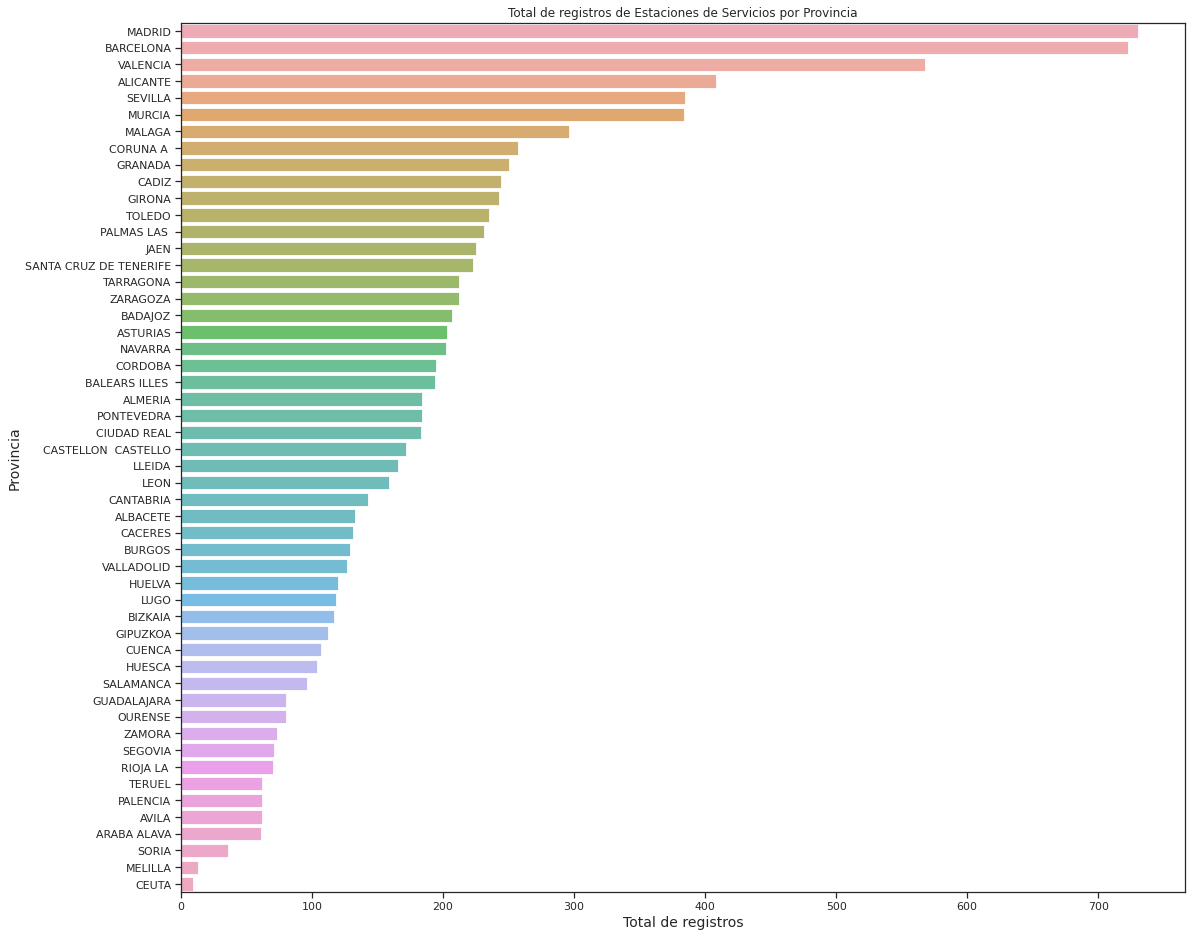

In [45]:
plt.figure(figsize=[18, 16])
sns.set(style="ticks")

frecuencia_provincias = df['Provincia'].value_counts()
sns.barplot(x=frecuencia_provincias.values, y=frecuencia_provincias.index, alpha=0.8);
plt.title('Total de registros de Estaciones de Servicios por Provincia');
plt.ylabel('Provincia', fontsize=14);
plt.xlabel('Total de registros', fontsize=14);

Vemos que la mayor cantidad de Estaciones de Servicios se encuentran en las urbes de mayor tamaño como son Madrid, Barcelona y Valencia.



---



**- Variable: Localidad**

Es la identificación de la ciudad o localidad de la Estación de Servicio.

In [10]:
df.Localidad.unique()

array(['CUESTA LA        ', 'LA LAGUNA', 'SANTA CRUZ DE TENERIFE  ', ...,
       'MONTSENY         ', 'VERGER EL        ', 'BAUL           '],
      dtype=object)

In [11]:
len(df.Localidad.unique())

3887

Al igual que la variable anterior esta se puede identificar como una **variable cualitativa del tipo nominal**, donde existen 3887 clasificaciones por lo que es una variable **categórica o de clasificación**.

Su tabla de frecuencia es la siguiente:

In [18]:
df.Localidad.value_counts()

MADRID                     203
BARCELONA                   85
SEVILLA                     65
VALENCIA                    57
MALAGA                      54
                          ... 
TIETAR                       1
NAVALCABALLO                 1
BURGUILLOS DE TOLEDO         1
VELEZ DE BENAUDALLA          1
BAUL                         1
Name: Localidad, Length: 3887, dtype: int64



---





**- Variable: Codigo_postal**

Es un valor numerico único que identifica un codigo asociado a una dirección especifíca o a una localidad especifíca.

Cantidad de registros únicos:

In [12]:
len(df.Codigo_postal.unique())

array([38320, 38200, 38110, ...,  6228,  3770, 18860])

Tabla de Frecuencia:

In [13]:
df.Codigo_postal.value_counts()

41500    23
11500    22
4700     21
11130    21
30500    20
         ..
36612     1
36670     1
36890     1
33570     1
18860     1
Name: Codigo_postal, Length: 4198, dtype: int64

Esta variable aunque esta representada en forma numerica, es una etiqueta que es una variable del tipo **cualitativa ordinal** ya que el significado de cada numero nos indica un lugar en una localidad,barrio o ciudad. En este mismo contexto, podemos indicar que para análisis de datos es una variable **Categórica**.


---



**- Variable: Direccion**

Identifica a la dirección de la Estación de Servicio, esta debería ser unica para cada uno de las Estaciones.

Cantidad de registros únicos:

In [14]:
len(df.Direccion.unique())

9699

Tabla de Frecuencia:

In [15]:
df.Direccion.value_counts()

AVENIDA ANDALUCIA SN               11
AVENIDA JUAN CARLOS I SN            7
AVENIDA CONSTITUCION SN             5
AVENIDA DEL MEDITERRANEO SN         4
AVENIDA REINA SOFIA SN              3
                                   ..
AVENIDA FEDERICO SILVA MUNOZ 21     1
CR N631 43 4                        1
CARRETERA N620 KM 307 000           1
CARRETERA TOROSALAMANCA KM 21       1
AUTOVIA A92 KM 322                  1
Name: Direccion, Length: 9699, dtype: int64

Vemos que existen repeticiones en algunas direcciones de Estación de Servicios, por lo que la identificaremos como una variable del tipo **cualitativa nominal**, y que se considera para analisis de datos como una variable del tipo **clasificación o categórica**.


---




**- Variable: Margen**

El margen indica si cuando vas conduciendo la Estación de Servicio está a la derecha o a la izquierda.

In [16]:
df.Margen.unique()

array(['D', 'N', 'I'], dtype=object)

Podemos ver que existen 3 valores, ya que N es aplicable para valores donde NO Aplica esta condición, ya que lo más probable que la calle o avenida donde esta ubicada la Estación de Servicio puede ser doble vía (doble tránsito).

Veamos la Tabla de Frecuencia:

In [17]:
df.Margen.value_counts()

D    5016
I    2596
N    2379
Name: Margen, dtype: int64

Considerando que existen tres valores asociados a el total de registros, esta variable debe ser analizada como de **Clasificación o Categórica** desde el analisis de datos. En su naturaleza es una variable del tipo **Cualitativa nominal** ya que no interesa el orden de las variables para un análisis. Utilizaremos un gráfico de barras para representarla.



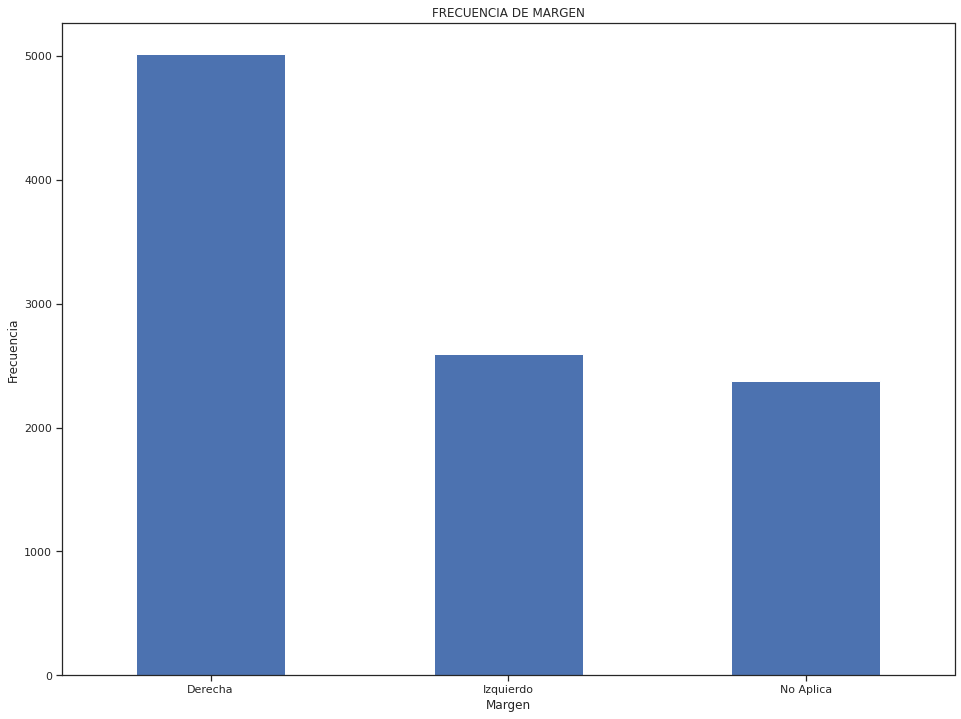

In [29]:
plt.figure(figsize=[16, 12])

ax = df.Margen.value_counts().plot(kind = 'bar', align='center');
ax.set_xlabel('Margen')
ax.set_ylabel('Frecuencia')
ax.set_title('FRECUENCIA DE MARGEN')
ax.set_xticklabels(['Derecha','Izquierdo','No Aplica'], rotation = 360);

En el gráfico se ve claramente la preferencia de las Estaciones de Servicios a orientarse a la Derecha del conductor. Esto puede estar asociado al sentido de la circulación de los vehículos en España (*) que es por el lado derecho.


(*) https://es.wikipedia.org/wiki/Sentido_de_la_circulaci%C3%B3n



---





**- Variable: Toma_de_datos**

Se refiere a la fecha y hora asociada a la toma de dato relacionada al precio.

Aunque la variable se consume como una representación numerica, esta debe ser considerada como una variable del tipo **Cualitativa ordinal** y desde un punto de vista de analisis de datos se debe considerar como **Categórica**.


Tabla de Frecuencia:




In [53]:
df.Toma_de_datos.value_counts()

01 08 2020 0000    2857
01 08 2020 2045     260
31 07 2020 1400     214
01 08 2020 0600     149
31 07 2020 1040     143
                   ... 
27 07 2020 0833       1
28 07 2020 0909       1
21 07 2020 2056       1
28 07 2020 1557       1
31 07 2020 1450       1
Name: Toma_de_datos, Length: 2800, dtype: int64



---



---



**- Variable: Precio**

Se refiere al valor de la Gasolina de 95 octanos en el periodo indicado en toma de datos, la cual esta representada por un valor numerico que incluye decimales.

Analicemos como se distribuyen sus valores, para ello utilizaremos la **Regla de Sturges**, la cual es una regla práctica acerca del número de clases que deben considerar al elaborarse un histograma.

La Regla de Sturges nos propone que dadas N observaciones, el número k de intervalos viene dado por:

k=1+log2(N) (**)


(**) fuente: https://es.wikipedia.org/wiki/Regla_de_Sturges

In [46]:
k = 1 + math.log2(len(df))
print(round(k))

14


Ahora podemos establecer los 14 intervalos:

In [47]:
df.Precio.value_counts(bins=14).sort_index()

(0.756, 0.807]       6
(0.807, 0.857]      29
(0.857, 0.906]     112
(0.906, 0.955]      86
(0.955, 1.004]     240
(1.004, 1.054]     456
(1.054, 1.103]    1124
(1.103, 1.152]    1427
(1.152, 1.202]    3721
(1.202, 1.251]    2543
(1.251, 1.3]       241
(1.3, 1.349]         4
(1.349, 1.399]       0
(1.399, 1.448]       2
Name: Precio, dtype: int64

Al gráficar un Histograma observamos:

Text(0.5, 1.0, 'Histograma Precios Gasolinas 95 octanos')

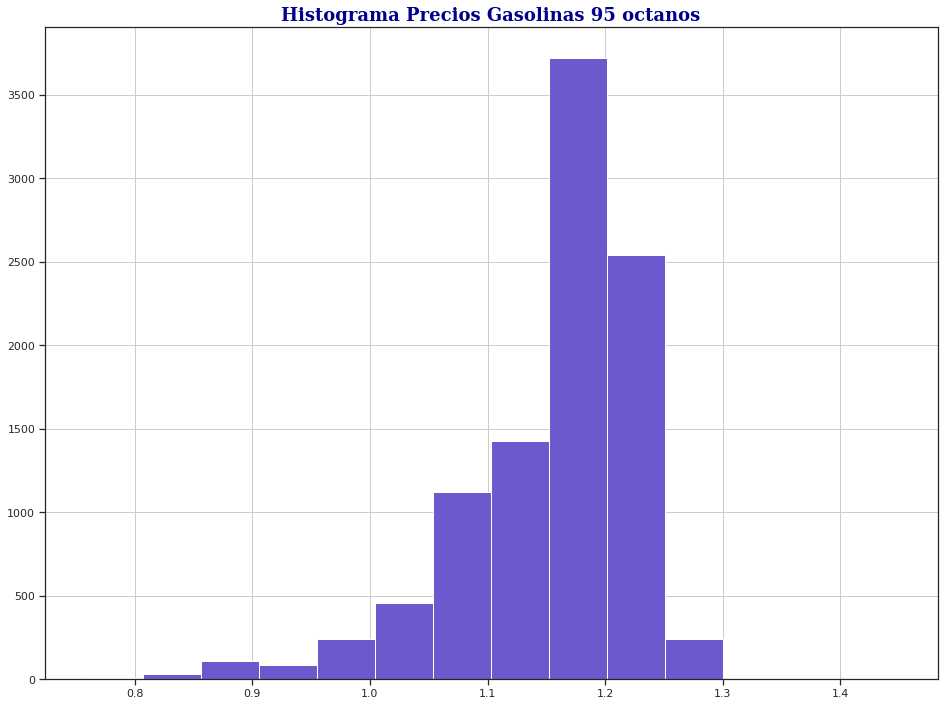

In [42]:
plt.figure(figsize=[16, 12])
df.Precio.hist(color='slateblue', bins=14);
plt.title("Histograma Precios Gasolinas 95 octanos", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})


Esta variable es del tipo **Cuantitativa continua** ya que esta expresada como un valor numerico del tipo flotante que identifica un precio con decimales. Desde un punto de vista de analisis de datos la podemos declarar como una variable **Analítica**.

El Histograma nos muestra que es asimetrica hacia la izquierda, indicandonos que los precios se agrupan más hacia valores altos que bajos.


---





**- Variable: Rotulo**

Esta variable representa a la Empresa o distribuidor de Gasolina asociada a la Estación de Servicio.

In [18]:
df.Rotulo.unique()

array(['PCAN', 'OCEANO', 'GMOIL', ..., 'HELLIN GAS S L ',
       'MURILLO ROJO SL', 'BIOIL'], dtype=object)

Tabla de Frecuencia:

In [19]:
df.Rotulo.value_counts()

REPSOL                            2698
CEPSA                             1330
GALP                               508
SHELL                              365
BP                                 211
                                  ... 
ESTACION DE SERVICIO ARALAR          1
E S KONTXA S L                       1
GASOILS CARRERAS DE PIERA S L        1
TAXCO                                1
BIOIL                                1
Name: Rotulo, Length: 2850, dtype: int64

Esta variable  **Categórica** es del tipo **Cualitativa nominal**, ya que existen grandes consorcios que tienen asociados a más de una Estación de Servicios, por lo que se pueden clasificar por esta variable. 



---



---



**- Variable: Tipo Venta**

Representa a la forma de venta asociada al precio.

In [20]:
df.Tipo_venta.unique()

array(['P', 'A', 'R', 'N', 'p'], dtype=object)

Esta varible en su naturaleza es **Cualitativa nominal**, ya que representa a más de una forma de venta y no tiene un orden establecido. Asi se puede clasificar como una variable de **Clasificación o Categórica**, ya que podemos agrupar por sus valores.

Tabla de Frecuencia:

In [54]:
df.Tipo_venta.value_counts()

P    9772
R     168
A      43
p       6
N       2
Name: Tipo_venta, dtype: int64

La mayoría de Tipo de Venta es a:


*   P: Venta al público en general.



---



---






**- Variable: Rem**

Se refiere al origen de los datos procedentes, indicando 2 valores.


*   OM: Datos procedentes del operador mayorista.
*   DM: Datos procedentes del distribuidor minorista.




In [21]:
df.Rem.unique()

array(['dm', 'OM'], dtype=object)

Esta variable al tener dos valores unicos se puede considerar en su naturaleza como una variable **Cualitativa Binaria** y desde el punto de analisis de datos es de **Clasificación o Categórica**.


Tabla de Frecuencia:







In [55]:
df.Rem.value_counts()

dm    6286
OM    3705
Name: Rem, dtype: int64

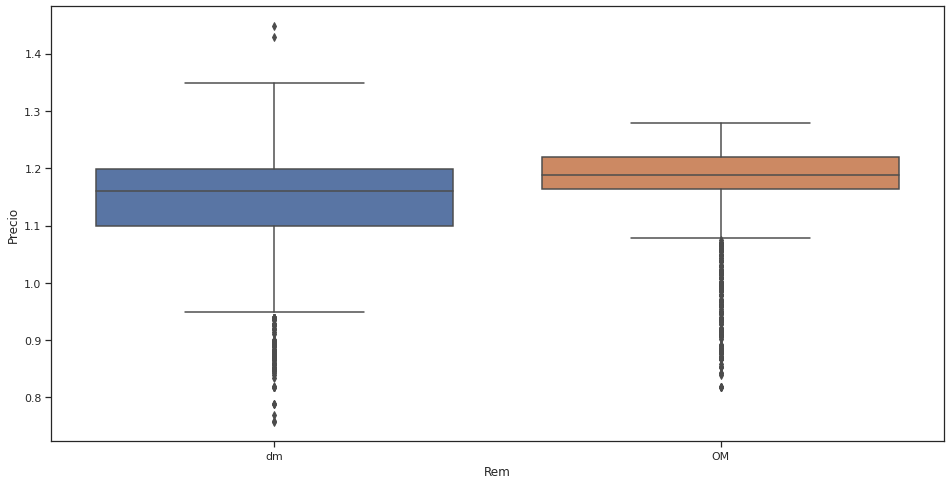

In [59]:
plt.figure(figsize=[16, 8])
sns.boxplot(x=df.Rem, y=df.Precio, width=0.8);
plt.show()


En el boxplot se observa como los precios cuando es OM (Operador Mayorista), la mediana se sitúa en el centro de la caja entonces la distribución es simétrica y tanto la media, mediana y moda coinciden.

En el caso de precios cuando es DM (Distribuidor minorista) se observa un mayor cantidad de valores atípicos (outilers en inglés).

**- Variable: Horario**

Variable que representa el horario de atención de la Estación de Servicio.

Tabla de Frecuencia

In [50]:
df.Horario.value_counts()

LD 24H                               3814
LD 06002200                          1343
LD 07002300                           807
LD 07002200                           261
LD 06002300                           240
                                     ... 
LV 07002100 D 14002100                  1
LD 06001400 y 17002200                  1
LV 07001430 y 17002100 S 08001400       1
LV 06002000 SD 10001400                 1
L 09002000                              1
Name: Horario, Length: 1309, dtype: int64

Se puede observar que esta variable toma muchos valores y en diferentes formatos y se debe considerar como **Cualitativa nominal**, ahora para analisis de datos debemos considerarla como **Categórica**, ya que estas pueden agrupar registros por horarios de atención.



---



**Variable: Tipo_servicio**

Se refiere a la forma en la cual el cliente recibe el servicio de venta de gasolina, segun diccionario puede ser:


Tabla de Frecuencia:







In [52]:
df.Tipo_servicio.value_counts().head(20)

LD 24H  A                                      3318
LD 06002200  A                                 1180
LD 07002300  A                                  616
LD 07002200  A                                  234
LD 06002300  A                                  214
LD 07002300  P                                  160
LD 24H  D                                       129
LD 06002359  A                                  122
LD 06302230  A                                  121
LD 06002200  P                                  113
LD 06000000  A                                   89
LD 07002100  A                                   84
L 06002200  A                                    71
LD 24H  P                                        65
L 07002300  A                                    65
LD 08002200  A                                   48
L 07002200  A                                    47
LD 00000600  A   06002200  P   22002359  A       46
LD 08002000  A                                   36
LD 06302200 

Esta variable es recogida como **Cualitativa nominal** ya que entre sus abreviaciones yo puedo distinguir una serie de información que después de un proceso de limpieza de data podría considerarla como una variable de **Clasificación**.



---







**Variable: Fecha_extraccion**

Variable que representa la fecha de extracción de la información desde la fuente de datos.

In [51]:
df.Fecha_extraccion.unique()

array(['01 08 2020'], dtype=object)

La variable como tal, es una variable recogida o expresada de forma numerica cuyo uso en el analisis de datos es **Categórica**, y sirve, por ejemplo, para clasificar la información por la fecha de extracción. Aunque en este caso, solo tenemos data de un día especifico de extracción se puede identificar a la variable como **Cualitativa ordinal**.